# I. Programmation d'un neurone artificiel

## 1.1. Diagramme fonctionnel 

Le DS utilisé (X, y) est composé, de 100 lignes et 2 colonnes, en imaginant que ce dernier représente des plantes avec la largeur et la longueur de leurs feuilles. Le modèle devra définir si la plante est toxique ou non à l'aide de ses données de référence.   

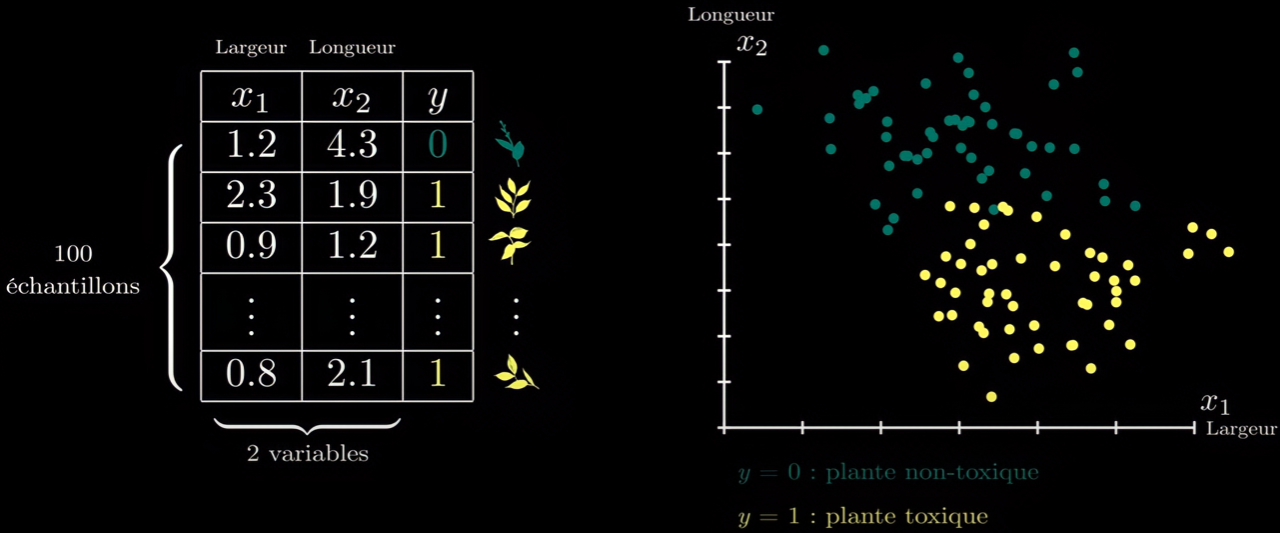

Pour ce faire le code sera constitué de la manière suivante : 
- Une fonction d'initialisation (X) : elle permet d'initialiser les paramètres $W$ et $b$ du modèle. Dans cette fonction passera la matrice $X$ afin d'obtenir une matrice $W$ qui contient autant de paramètres que de variables dans la matrice $X$ 
- Un algorithme iteratif qui executera les fonctions : 
    - De Model (X, W, b) : elle représente les fonctions du neurone artificiel, dans laquelle nous retrouvons la regression linéaire $ Z $ ainsi que la fonction d'activation $ A $
    - D'évalution (A, y) : il s'agit de la FC qui permettra d'évaluer la performance du modèle en comparant la sortie $A$ au données de références $y$. 
    - De calcul des gradients 
    - De mise à jour des paramètres $W$ et $b$ afin de réduire d'une petite quantité les erreurs du modèle.

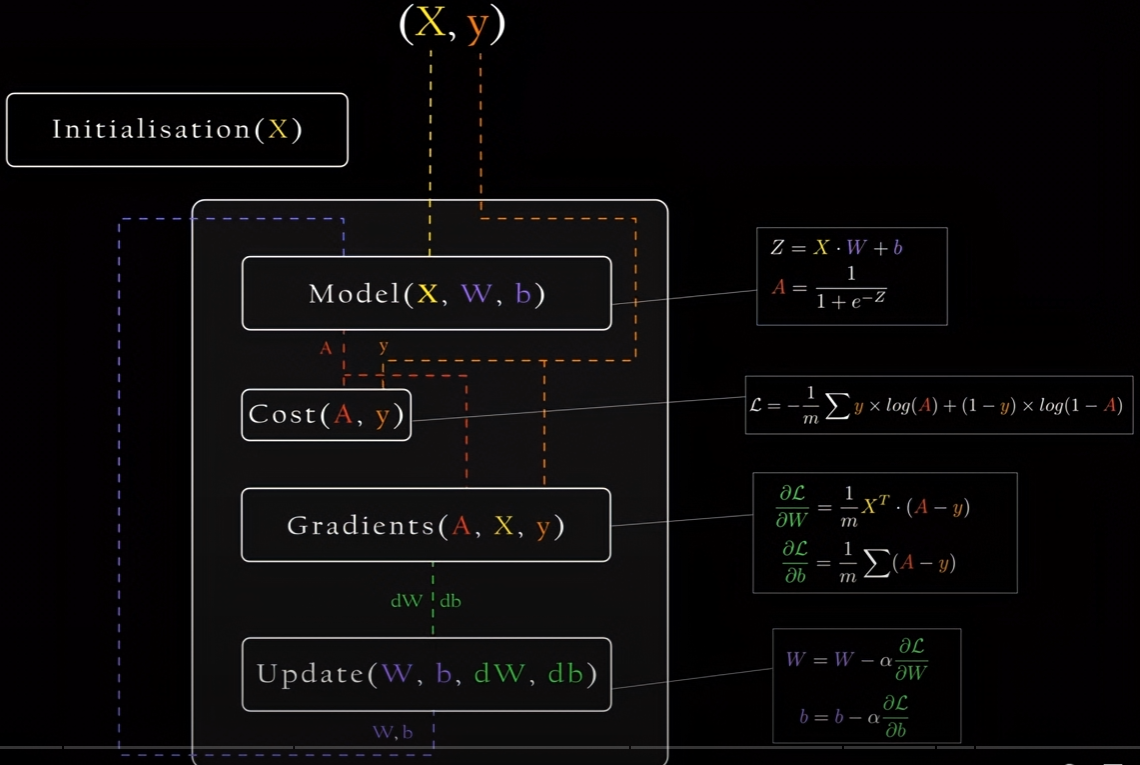

C'est ce que l'on appelle l'algorithme de la descente de gradients. 

## 1.2. Implémentation des fonctions d'un seul neurone

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

Dimensions de X : (100, 2)
Dimensions de y : (100, 1)


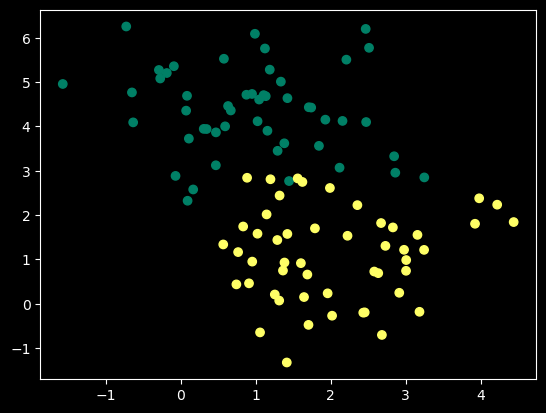

In [2]:
# Génération  du DS (X, y) comprenant : 
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0) #n_samples = nombre de lignes ; n_features = nombre de variables
y = y.reshape((y.shape[0],1))

print('Dimensions de X :', X.shape)
print('Dimensions de y :', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [3]:
# Création de la fonction d'initialisation dans laquelle on fait passer la matrice X. 
def initialisation(X):
    W = np.random.randn(X.shape[1], 1) # X sert à donner une dimension pour autant de paramètres dans W que de variables dans X.
    b = np.random.randn(1)
    return(W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b # Calcul du vecteur Z 
    A = 1 / (1 + np.exp(-Z)) # Calcul de la fonction d'activation
    return A # Retourne la fonction d'activation

In [5]:
def log_loss(A, y):
    # Permet d'éviter les erreur de log(0) => recommandation SkLearn
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

## 1.3. Assemblage final et effectuer des futures prédictions 

In [8]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm # Librairie Taqadum pour affichage de barre de progression 

In [9]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [10]:
def artificial_neuron_1(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)

    # Création des listes pour pouvoir analyser le comportement du model 
    train_loss = [] # Le coût lors de l'entrainement
    train_acc = [] # La performance lors de l'entrainement
    test_loss = [] # Le coût lors du test
    test_acc = [] # La performance lors lors du test

    for i in tqdm(range(n_iter)):
        # Calcul de la fonction d'action par rapport aux données du model 
        A = model(X, W, b)

        # Condition pour limiter le nombre de calcul du coût et de la performance et leur ajout aux listes (impacte fortement rapidité du code)
        if (i %10 == 0): # Si i est modulo de 10 => i est un multiple de 10 = reste de la division = 0
            # Train phase
            train_loss.append(log_loss(A, y)) # Calcul du coût sur le y_train
            y_pred = predict(X, W, b) # Calcul des prédiction sur le X_train
            train_acc.append(accuracy_score(y, y_pred)) # Calcul de la performance en comparant le y_train et le y_pred
  
            # Test phase
            A_test = model(X, W, b) # Calcul de la fonction d'activation du X_test
            test_loss.append(log_loss(A_test, y)) # Calcul du coût sur le y_test
            y_pred = predict(X, W, b) # Calcul des prédiction sur le X_test
            test_acc.append(accuracy_score(y, y_pred)) # Calcul de la performance en comparant le y_test et le y_pred

        # Mise à jour 
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Création de la figure composée des subplot du coût et de la performance de notre model pour les phases d'entrainement et de test
    plt.figure(figsize=(12,4))
    # Subplot pour comparer le coût lors de l'entrainement et du test avec 1 ligne, 2 colonnes, première figure
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.legend()
    # Subplot pour comparer la performance lors de l'entrainement et du test avec 1 ligne, 2 colonnes, deuxième figure
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuaracy')
    plt.plot(test_acc, label='Test Accuaracy')
    plt.legend()
    
    plt.show()

    return (W, b)

    

##### A debug 
Afficher Train loss et train accuaracy

100%|██████████| 100/100 [00:00<00:00, 457.57it/s]


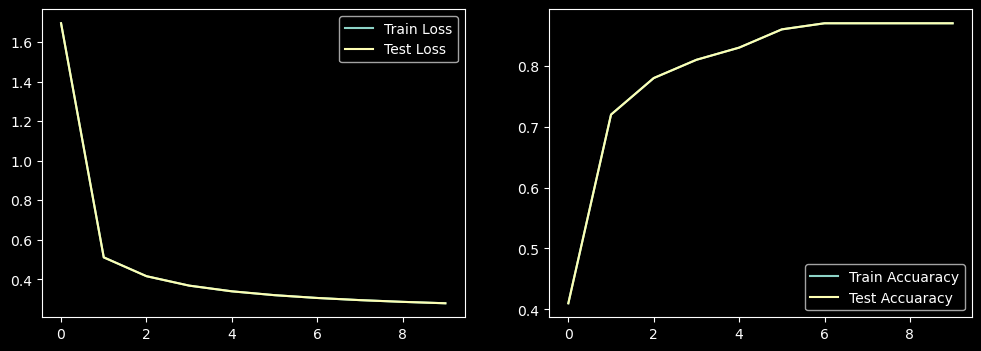

In [11]:
W, b = artificial_neuron_1(X, y)

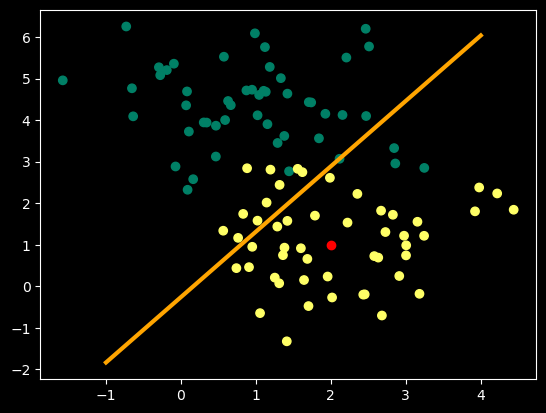

array([ True])

In [12]:
new_plant = np.array([2, 1]) # Création d'une nouvelle plante 

# Création de la frontière de décision 
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

# Visualisation de la plante dans le graphique 
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

predict(new_plant, W, b)

## 1.4. Visualisation 3D et Animation

In [13]:
import plotly.graph_objects as go

In [14]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type="orthographic"
fig.show()

In [15]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity=0.9, reversescale=True))


fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## 1.5 Application chien vs chat

### 1.5.1 Importation du DS

In [16]:
from utilities import *

In [17]:
X_train, y_train, X_test, y_test = load_data()

In [18]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [19]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


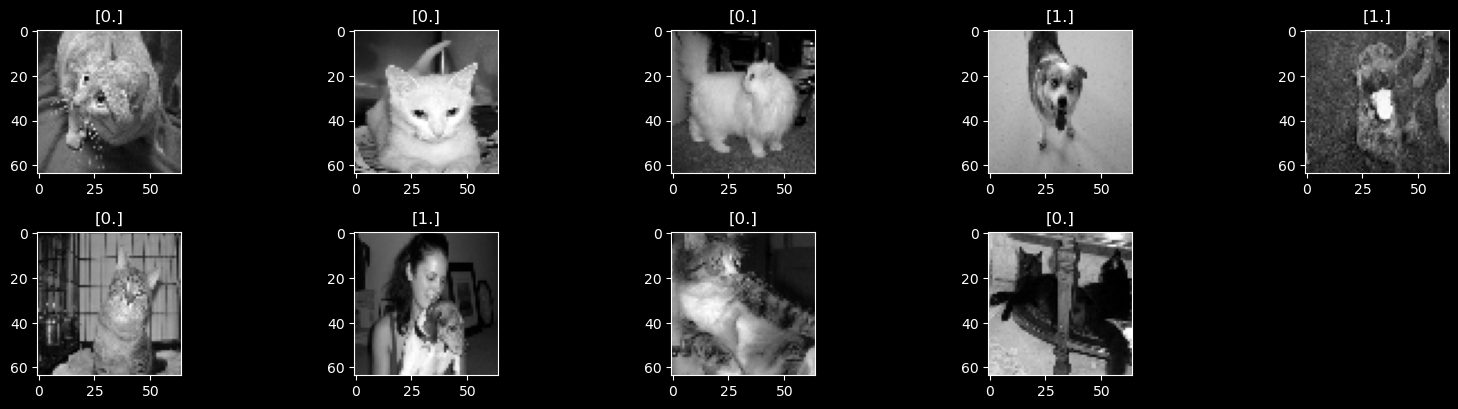

In [20]:
plt.figure(figsize=(16, 8))
for i in range(1, 10): 
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

### 1.5.2 Entrainement du modèle

* Point sur la normalisation utilisée (MinMax) : 

Mettre toutes nos variables (tous nos pixels) sur une echelle de [0 - 1] :  
  
$ X = \dfrac{X - X_{min}}{X_{max} - X_{min}} $  
  
Pour rappel : photos codées en 8 bits : 
- 8 bits : $2^8$ = 256
- pixel noir = 0
- pixel blanc = 255  
  
$ X = \dfrac{X - 0}{255 - 0} $  
  
$ X = \dfrac{X}{255} $  

In [21]:
# TO DO : 

# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# X_train.shape[0] permet d'utiliser la première dimension (1000) et -1 pour réorganiser le reste (soit 64 x 64)
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

print('Dimension de X_train_reshape : ', X_train_reshape.shape)
print('Dimension de X_test_reshape : ', X_test_reshape.shape)


Dimension de X_train_reshape :  (1000, 4096)
Dimension de X_test_reshape :  (200, 4096)


In [22]:
def artificial_neuron_2(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    
    W, b = initialisation(X_train)

    # Création des listes pour pouvoir analyser le comportement du model 
    train_loss = [] # Le coût lors de l'entrainement
    train_acc = [] # La performance lors de l'entrainement
    test_loss = [] # Le coût lors du test
    test_acc = [] # La performance lors lors du test

    for i in tqdm(range(n_iter)):
        # Calcul de la fonction d'action par rapport aux données du model 
        A = model(X_train, W, b)

        # Condition pour limiter le nombre de calcul du coût et de la performance et leur ajout aux listes (impacte fortement rapidité du code)
        if (i %10 == 0): # Si i est modulo de 10 => i est un multiple de 10 = reste de la division = 0
            # Train phase
            train_loss.append(log_loss(A, y_train)) # Calcul du coût sur le y_train
            y_pred = predict(X_train, W, b) # Calcul des prédiction sur le X_train
            train_acc.append(accuracy_score(y_train, y_pred)) # Calcul de la performance en comparant le y_train et le y_pred
  
            # Test phase
            A_test = model(X_test, W, b) # Calcul de la fonction d'activation du X_test
            test_loss.append(log_loss(A_test, y_test)) # Calcul du coût sur le y_test
            y_pred = predict(X_test, W, b) # Calcul des prédiction sur le X_test
            test_acc.append(accuracy_score(y_test, y_pred)) # Calcul de la performance en comparant le y_test et le y_pred

        # Mise à jour 
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    # Création de la figure composée des subplot du coût et de la performance de notre model pour les phases d'entrainement et de test
    plt.figure(figsize=(12,4))
    # Subplot pour comparer le coût lors de l'entrainement et du test avec 1 ligne, 2 colonnes, première figure
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.legend()
    # Subplot pour comparer la performance lors de l'entrainement et du test avec 1 ligne, 2 colonnes, deuxième figure
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuaracy')
    plt.plot(test_acc, label='Test Accuaracy')
    plt.legend()
    
    plt.show()

    return (W, b)

100%|██████████| 10000/10000 [00:38<00:00, 258.77it/s]


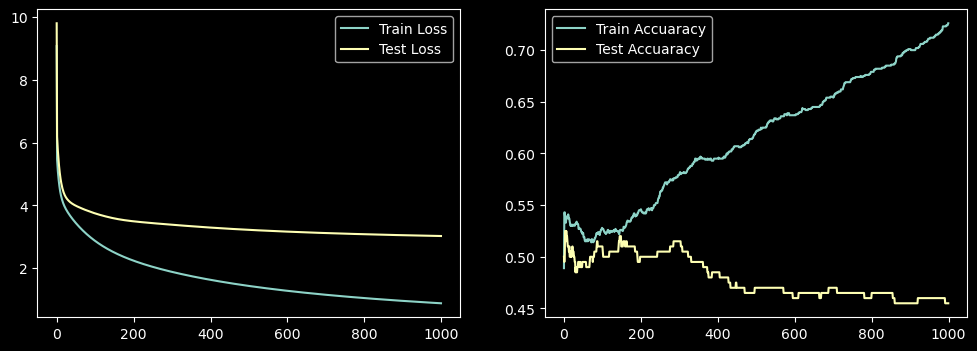

In [23]:
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-paramètres)
#    (Si problemes avec le log_loss, utiliser la fonction de sklearn -> metrics à la place)
W, b = artificial_neuron_2(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000) # Passage du LR de 0.1 à 0.01, car ici le DS est bien trop grand 

# 4. Evaluer le modele sur le test_set (tracer la courbe de Loss pour le test_set)

* Evaluer le modele sur le test_set (tracer la courbe de Loss pour le test_set).  
  
Diagnostique d'over-fitting : 
Après diminution de α de 0.1 à 0.01 et augmentation du nombre d'iterations de 100 à 10.000 le modèle n'est plus capable de généraliser, il se focalise tellement sur les exemples fournis lors de l'entrainement qu'il en perd la capacité à faire de bonne prédictions sur le test set.  
Pour determiner une situation d'over-fitting, on a un loss qui diminue pour un train set et commence à stagner voir augmenter pour le test set. Concernant l'accuaracy, la courbe augmente pour le train set, mais commence à stagner pour le test voir diminue. 
  
Il faut alors faire passer le train set et le test set à l'interieure de la fonction artificial neuron pour cela on remplace les paramètre X et y par X_train, y_train et X_test, y_test. 

Conclusion :  
- Il faudrait augmenter le nombre de photo, car ici 1000 n'est clairement pas assez pour entrainer un bon modèle de ML. 
- Quand il y a un grand décallage entre le nombre de photos et de variables (1000, 4096), on obtient un phénomène "Le fléau de la dimension" qui fait que l'espace dans lequel se trouve nos données est principalement rempli de vide, au sein du quel le modèle peut se déplacer comme il le veut et trouver la configuration qui l'arrange lui, pour obtenir un bon score sur le train set au détrimant de son score sur le test set.  
  
Il existe certaine techniques (comme la contrainte L1 ou L2) qui pourraient améliorer le modèle mais ça ne suffirait quand même pas. En réalité notre modèle ici est trop simpliste (1 seul neurone = modèle linéaire). Ce type de modèle ne peut en réalité être utilisé que sur des problèmes que l'on peut séparer linéairement. Dès lors qu'un DS devient plus compliqué, ce genre de modèle ne suffit plus. Avant de vouloir améliorer ce problème d'over-fitting il faut améliorer le modèle lui même et pour cela nous allons devoir rajouter d'autres neurones dans notre modèle formant ainsi notre premier résaux de neurones artificiel. 

### 1.5.3 Expérience sur la normalisation 

Pour cela, nous reprenons notre DS généré sur les plantes toxiques ou non. Dans ce dernier $x_1$ et $x_2$ sont du même ordre de grandeur ([-1, 4] et [-1, 6]), dans ce cas on ne peut pas dire qu'une valeur peut en écraser une autre. Dans cette expérience nous allons tracer la FC en fonction de $W_1$ et $W_2$. On pourra alors voir si la FC est compréssée dès lors qu'une de ces variables est très grande. 

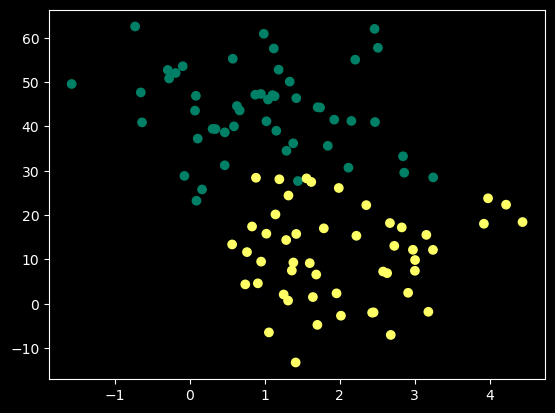

In [24]:
# Génération  du DS (X, y) comprenant : 
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0) #n_samples = nombre de lignes ; n_features = nombre de variables
X[:, 1] = X[:, 1] * 10

y = y.reshape((y.shape[0],1))

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [25]:
def artificial_neuron_3(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)
    #
    W[0], W[1] = -7.5, -7.5

    nb = 10
    j=0
    history = np.zeros((n_iter // nb, 5))
    Loss = []

    # Création d'une liste pour visualiser le cout 
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y)) #Ajout des valeurs du cout à chaque iteration 
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
        if (i % nb == 0): 
            history[j, 0] = W[0]
            history[j, 1] = W[1]
            history[j, 2] = b
            history[j, 3] = i
            history[j, 4] = log_loss(y, A)
            j += 1

    plt.plot(Loss)
    plt.show()

    return history, b

C:\Users\Valentin\AppData\Local\Temp\ipykernel_11168\1496279704.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Valentin\AppData\Local\Temp\ipykernel_11168\1496279704.py:22: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Valentin\AppData\Local\Temp\ipykernel_11168\1496279704.py:23: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



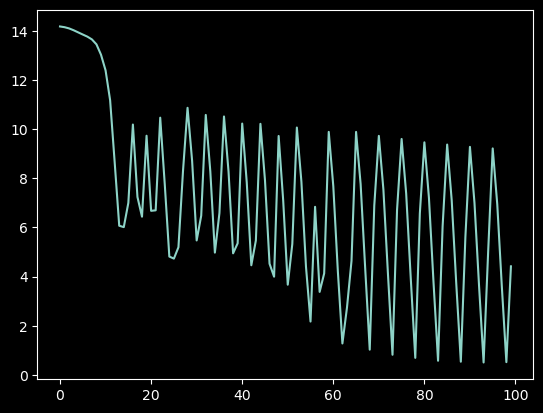

In [26]:
history, b = artificial_neuron_3(X, y)

In [27]:
# Limite de valeur
lim = 10
# Nombre de valeur 
h = 100

W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

# Combinaison de W1 et W2
W11, W22 = np.meshgrid(W1, W2)

# ravle() permet de flatten les vecteurs W11 et W22, puis on le transpose pour avoir (2, 10000)
W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [28]:
# Produit matriciel (100, 2) . (2, 10000)
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

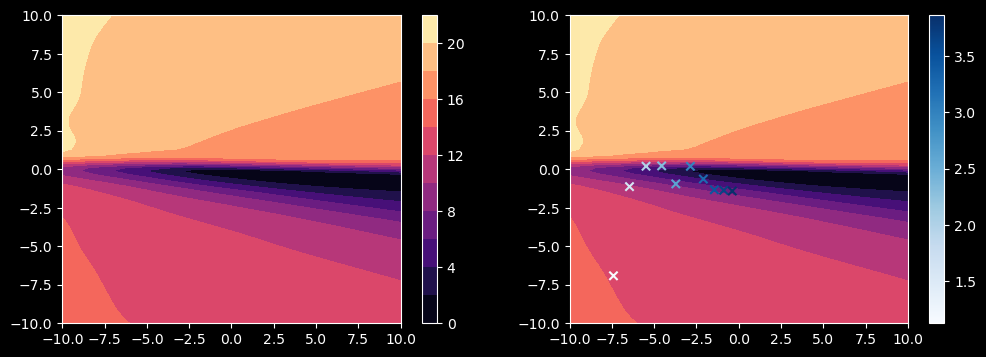

In [29]:
# Création du contour plot => 20 = nb de levels
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.scatter(history[:, 0], history[:, 1], c=history[:, 2], cmap='Blues', marker='x')
plt.colorbar()

In [30]:
import plotly.graph_objects as go

fig = (go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity=1)]))

fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()



# II. Programmation d'un réseau de neurones artificiels à 2 couches

## 2.1. Implémentation des fonctions d'un perceptron à 2 couches

In [31]:
#  n0 = nombre d'entrées du réseau
#  n1 = nombre de neurones dans la couche 1
#  n2 = nombre de neurones dans la couche 2 (la sortie)
def initialisation(n0, n1, n2):
    # Paramètres de la première couche
    W1 = np.random.randn(n1, n0) 
    b1 = np.random.randn(n1, 1)
    # Paramètres de la deuxième couche 
    W2 = np.random.randn(n2, n1) 
    b2 = np.random.randn(n2, 1)
    
    # Création d'un dictionnaire contenant les paramètres, puis le retourner ce qui permet de manipuler uniquement ce conteneur dans le reste du code 
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }

    return parametres

In [32]:
# Modele du DNN => Forward propagation 
# Comme on a créer un dictionnaire de paramètres ci dessous, on l'utilise à la place de W et b
def forward_propagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1)) 
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2)) 

    activations = {
        'A1' : A1,
        'A2' : A2
    }

    return activations # Nous aurons besoin de A[1] pour calculer les gradients dW[2] et dZ[1]


In [33]:
# Descente de gradients du DNN => Backward propagation
def back_propagation(X, y, activations, parametres): 
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    # Pour rappel, m est le nombre de données contenues dans notre DS
    m = y.shape[1]

    # Deuxième couche
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) # Pour rappel on fait la somme de dZ2 suivant l'axe 1. Keepdims permet de garder un tableau db2 en 2D. En effet pour mettre à jour b2 qui doit être de dimension (n2, 1), or si db2 est en dimension (n2), erreur lors du calcul
    
    # Deuxième couche
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

In [34]:
# Mise à jour des paramètres du DNN 
def update(gradients, parametres, learning_rate): 

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Mise à jour du dictionnaire de paramètres
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }

    return parametres

In [35]:
def predict(X, parametres): 
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

## 2.2. Assemblage final des fonctions d'un perceptron à 2 couches

In [36]:
def neural_network_1(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000): 

    # Definitions des variables // Rappel : X est en lignes maintenant 
    n0 = X_train.shape[0] # Nombre d'entrées du réseau 
    n2 = y_train.shape[0] # Nombre de neurones dans la couche 2 (la sortie)
    # n1, n'est pas défini ici car il s'agit du nb de neurones de la première couche, et nous le determinon nous même 

    # Initialisation des paramètres sur le dictionnaire défini précédemment 
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)): 

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

        if i %10 == 0: 
            train_loss.append(log_loss(y_train, activations['A2'])) # Ne pas oublier, on ne visualise que les activations à la sortie du réseau
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten()) # Ne pas oublier d'aplatir nos deux tableaux, pour les passer en 1D et éviter erreur SkLearn 
            train_acc.append(current_accuracy)

    plt.figure(figsize=(14,4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train accuracy')
    plt.legend()
    plt.show()

    return parametres

## 2.3. Création du Dataset 

In [37]:
from sklearn.datasets import make_circles

Dimension de X :  (2, 100)
Dimension de y :  (1, 100)


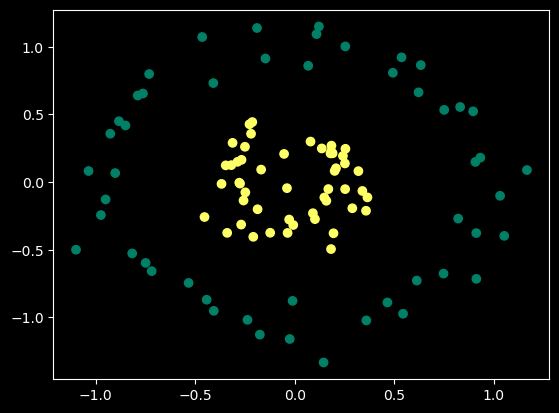

In [38]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimension de X : ', X.shape)
print('Dimension de y : ', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4948.08it/s]


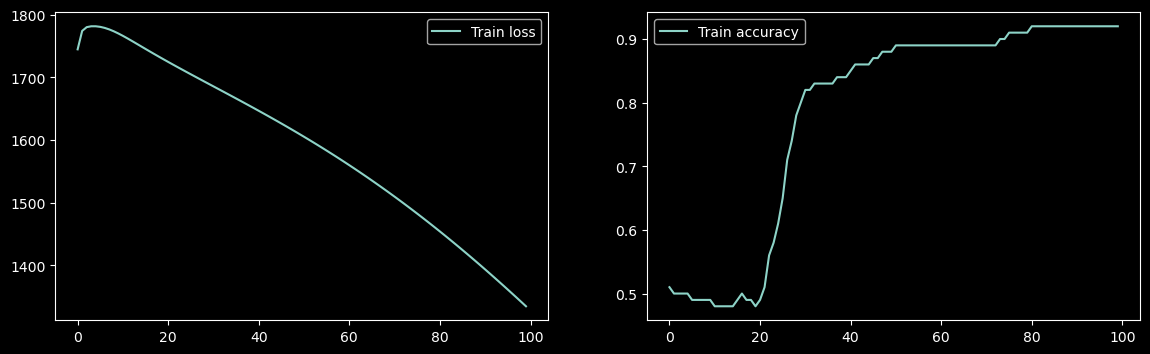

In [39]:
parametres = neural_network_1(X, y, n1=32, n_iter=1000, learning_rate=0.1)

## 2.4. Benchmark sur le nombre de neurones nécessaire 

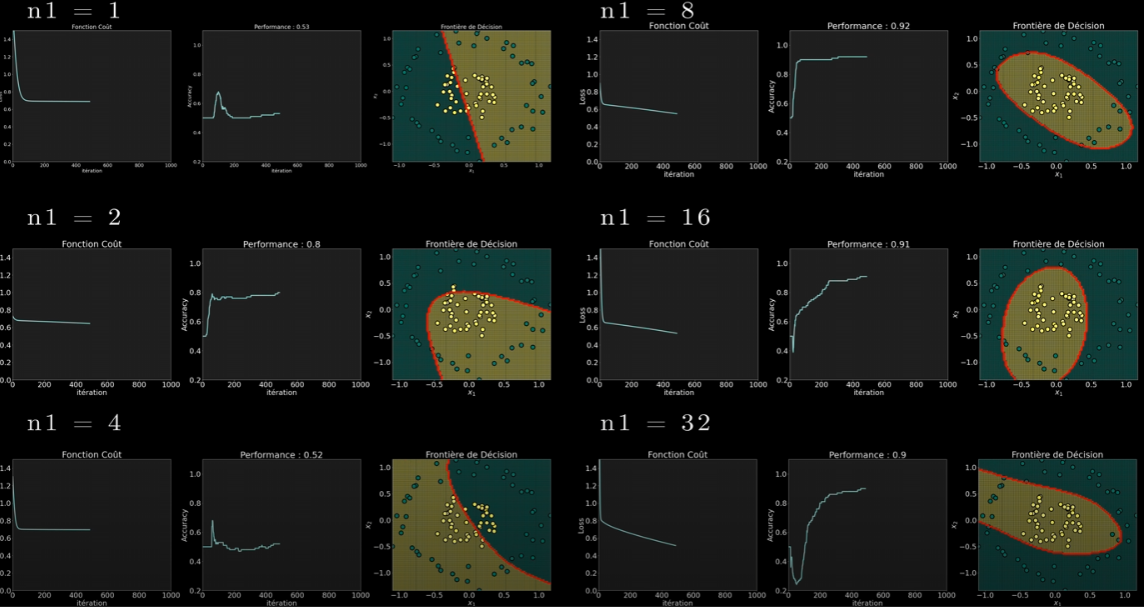

WIP : faire le code pour avoir l'image ci dessus avec visualisation 3D

## 2.5. Application chien vs chat avec perceptron à 2 couches

### 2.5.1 Importation du DS

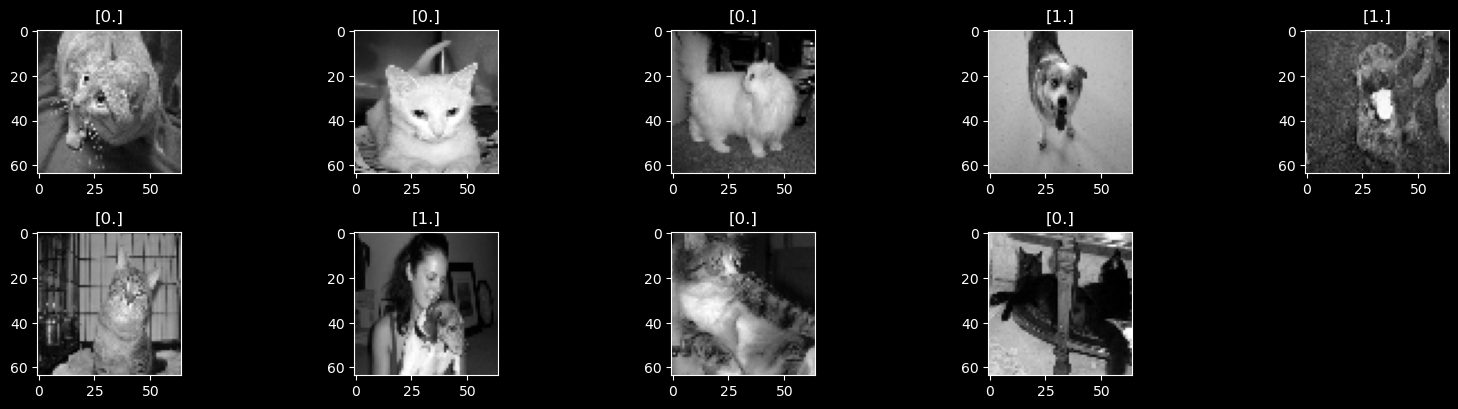

In [40]:
X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(16, 8))
for i in range(1, 10): 
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [41]:
print('*** Dimensions de X ***')
print('X train = ', X_train.shape)
print('X test  = ',X_test.shape)
print(' ')
print('*** Dimensions de y ***')
print('y train = ', y_train.shape)
print('y test  = ',y_test.shape)


*** Dimensions de X ***
X train =  (1000, 64, 64)
X test  =  (200, 64, 64)
 
*** Dimensions de y ***
y train =  (1000, 1)
y test  =  (200, 1)


In [42]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print('*** Dimensions de X_reshape ***')
print('X train_reshape = ', X_train_reshape.shape)
print('X test_reshape  = ', X_test_reshape.shape)
print(' ')
print('*** Dimensions de y ***')
print('y train = ', y_train.shape)
print('y test  = ', y_test.shape)



*** Dimensions de X_reshape ***
X train_reshape =  (4096, 300)
X test_reshape  =  (4096, 80)
 
*** Dimensions de y ***
y train =  (1, 300)
y test  =  (1, 80)


100%|██████████| 8000/8000 [02:53<00:00, 46.20it/s]


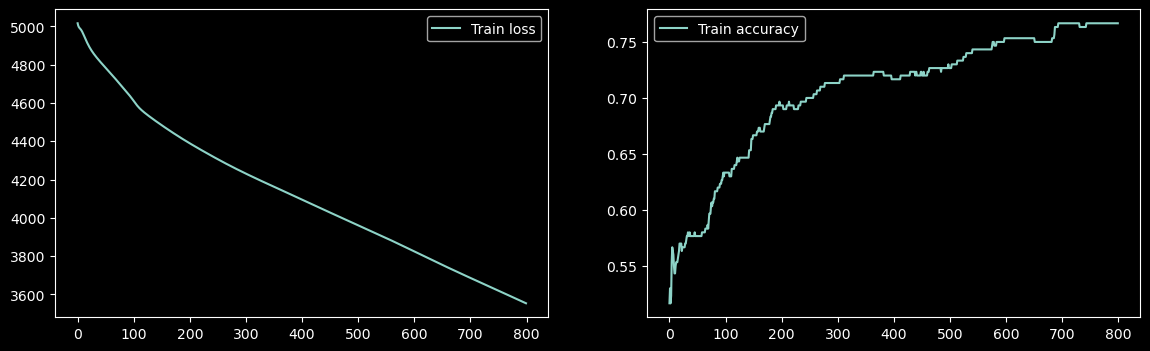

In [43]:
# X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000

parametres = neural_network_1(
    X_train_reshape, y_train,
    n1 = 32, learning_rate = 0.01, n_iter = 8000
)

# III. Programmation d'un réseau de neurones profond

## 3.1. La généralisation des paramètres d'un réseau de neurones profond

### 3.1.1. L'initialisation d'un réseau profond

In [55]:
# On fait passer les dimensions du réseau directement dans cette fonction
def initialisation_2(dimensions): 

    # Initialisation du dictionnaire des paramètres => vide    
    parametres = {}
    
    # On récupère la longueur de ce tableau, comprenant le nombre de dimensions
    C = len(dimensions)

    # Boucle permettant de créer chacun de nos paramètres W[c], b[c] du réseau, avec leurs dimensions associées, allant de 1 à c
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1]) 
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1) 

    return parametres

In [56]:
parametres = initialisation_2([2, 32, 32, 1])

for key, val in parametres.items(): 
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


### 3.1.2. La forward propagation d'un réseau profond

In [57]:
def forward_propagation_2(X, parametres):
    
    # Initialisation de notre dictionnaire d'activation
    activations = {'A0' : X} # Rappel : pour Z[1], on pose X = A[0]

    # Longueur du réseau = longueur du dictionnaire parametres
    C = len(parametres) // 2 # // = division entiere pour tomber sur un nombre entier 
    
    # Boucle allant de la première à la toute dernière. On calcul ici tous les Z allant de 1 à C
    # Où C est la couche finale du réseau. La fonction rage s'arrete un nombre avant la limite. DOnc revient à dire i <= C dans ce cas ci dessous. 
    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)] # Récupération de la clé W à la couche en cours. Don au début quand quand Z = 1, on récupère 1 - 1  don activation A[0] où A[0] = X 
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z)) # On fait passer A directement dans le dictionnaire. Donc ce dernier retourné contient toutes les activations du réseaux
    return activations 

In [58]:
activations = forward_propagation_2(X, parametres)

for key, val in activations.items():
    print(key, val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


### 3.1.3. La backward propagation d'un réseau profond

In [70]:
# Descente de gradients du DNN => Backward propagation
def back_propagation_2(y, activations, parametres): 
    
    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    # Ne pas oublier d'inverser la boucle, pour aller de la dernière à la première couche 
    for c in reversed(range(1, C + 1)): 
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)

        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

In [60]:
grad = back_propagation_2(y, activations, parametres)

for key, val in grad.items():
    print(key, val.shape)

dw3 (1, 32)
db3 (1, 1)
dw2 (32, 32)
db2 (32, 1)
dw1 (32, 2)
db1 (32, 1)


In [71]:
# Mise à jour des paramètres

def update_2(gradients, parametres, learning_rate): 

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] =  parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] =  parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

### 3.1.2. Assemblage final des fonctions d'un réseau profond

In [72]:
def neural_network_2(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 1000): 

    np.random.seed(0)

    # Initialisation des paramètres W, b
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation_2(dimensions)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)): 

        activations = forward_propagation_2(X, parametres)
        gradients = back_propagation_2(y, activations, parametres)
        parametres = update_2(gradients, parametres, learning_rate)

        if i %10 == 0:
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict_2(X, parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

    # Visualisation des résultats 
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    ax[0].plot(train_loss, label='Train Loss')
    ax[0].legend()

    ax[1].plot(train_acc, label='Train Accuracy')
    ax[1].legend()
    visualisation(X, y, parametres, ax)
    plt.show

    return parametres


In [73]:
def predict_2(X, parametres):
    activations = forward_propagation_2(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]

    return Af >= 0.5

100%|██████████| 1000/1000 [00:00<00:00, 2288.34it/s]


NameError: name 'visualisation' is not defined

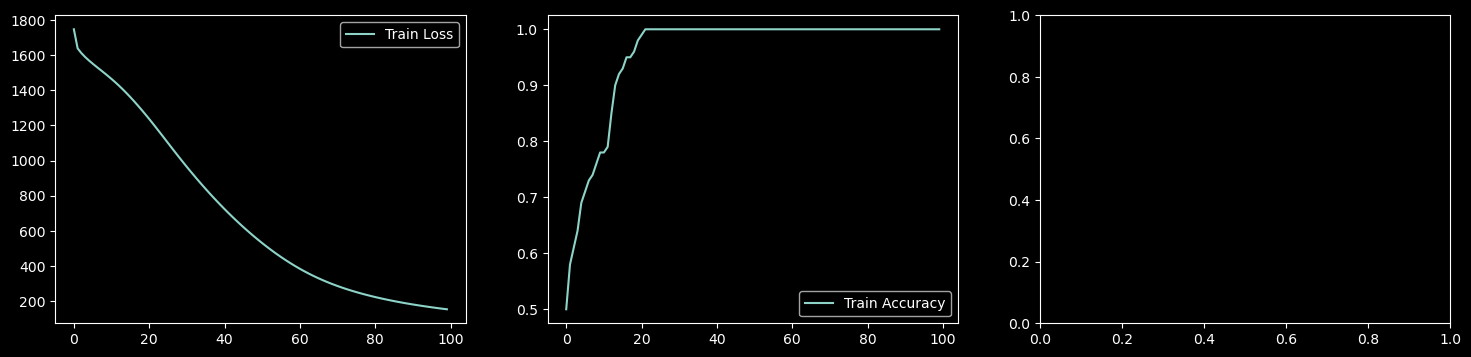

In [74]:
parametres = neural_network_2(X, y)

## 2. Autres fonctions d'activation
## 3. Activation softmax 
## 4. Problèmes de régression 

# V. Tensorflow - Keras 

## 1. Fonctionnement général 
## 2. Contenu de la librairie 
## 3. Projets 
### 3.1. Vision par ordinateurs - CNN 
### 3.2. Traitement du langage naturel - RNN 
### 3.3. D'autres surprises !

α ∂ σ ○ ● 
\dfrac{}{}
.^{[]}